In [1]:
import numpy as np
from sklearn.manifold import TSNE
import torch
from transformers import BertConfig, BertModel, BertTokenizer
from transformers import BertForMaskedLM, BertTokenizerFast, pipeline
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

/home/customer/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
config = BertConfig.from_json_file("config.json")
model = BertForMaskedLM.from_pretrained('/home/customer/hyr/matbert-uncased（copy-version）')
tokenizer = BertTokenizerFast.from_pretrained('/home/customer/hyr/matbert-uncased（copy-version）', do_lower_case=False)
# unmasker = pipeline('fill-mask', model=model, tokenizer=tokenizer)

In [3]:
# 提取和'perovskite'余弦值相似性最高的1000个词语
perovskite_vector = model.base_model.embeddings.word_embeddings.weight[tokenizer.convert_tokens_to_ids('perovskite')].detach().numpy()
word_embeddings = model.base_model.embeddings.word_embeddings.weight.detach().numpy()
cos_similarities = np.dot(word_embeddings, perovskite_vector) / (np.linalg.norm(word_embeddings, axis=1) * np.linalg.norm(perovskite_vector))


In [23]:
# 提取前最相似的词
top_indices = np.argsort(cos_similarities)[-8000:]
similar_words = [tokenizer.convert_ids_to_tokens(int(index)) for index in top_indices]



In [24]:
# 提取这些词语的向量
vectors = [word_embeddings[int(index)] for index in top_indices]

In [25]:

from umap import UMAP

# 使用UMAP进行降维
reducer = UMAP()
umap_embeddings = reducer.fit_transform(vectors)

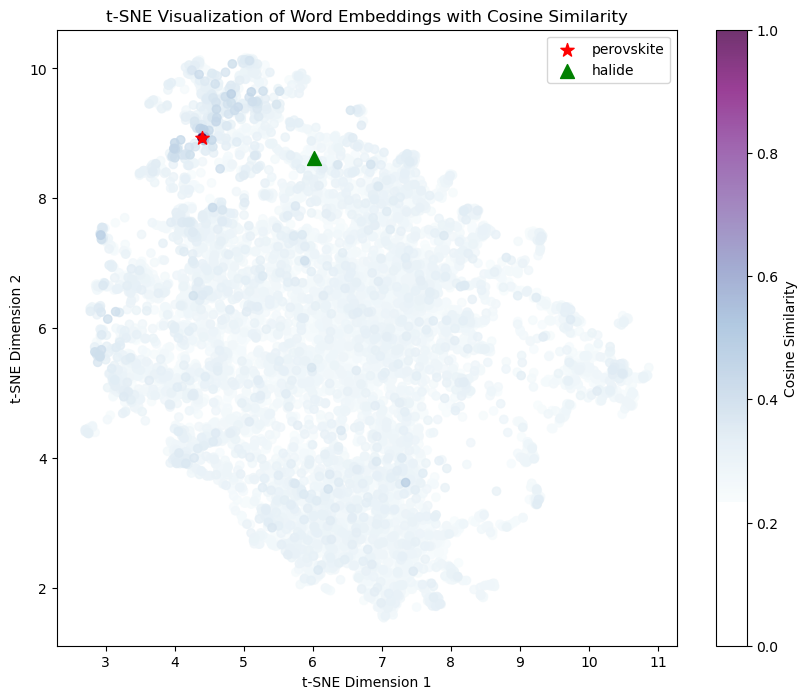

In [30]:
# word1_index = words.index("aminoguanidine")
# word2_index = words.index("additive")

word1_index = similar_words.index('perovskite')
word2_index= similar_words.index('halide')
cmap = plt.cm.BuPu
# 可视化词向量图
plt.figure(figsize=(10, 8))


# 绘制所有词向量的散点图，并根据余弦相似度值着色
scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c= cos_similarities[top_indices], cmap=cmap, alpha=0.8)

# 标记 "aminoguanidine" 和 "additive"
plt.scatter(umap_embeddings[word1_index, 0], umap_embeddings[word1_index, 1], c='red', marker='*', s=100, label='perovskite')
plt.scatter(umap_embeddings[word2_index, 0], umap_embeddings[word2_index, 1], c='green', marker='^', s=100, label='halide')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Word Embeddings with Cosine Similarity')
plt.legend()

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Cosine Similarity')

# 设置颜色条的范围，使其只显示蓝色部分
cbar.set_ticks(np.linspace(0, 1, 6))

# plt.axis([-50, 50, -60, 60])

plt.savefig('perovskite.png')  # 可以将文件名修改为您想要的文件名和路径

plt.show()